In [280]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
import scipy.stats as st
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4


In [281]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train.shape, test.shape

((1460, 81), (1459, 80))

80 feature variables to work with. Already, I see some missing values and a mixture of ordinal and nominal variables

In [282]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [284]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


Look at some random categorical data 

## General Preprocessing or Feature Engineering (not in the folds)
- This is preprocessing on everything such that including the test set won't affect the distribution of any results in the preprocessing

### Getting rid of outliers

Text(0,0.5,'SalePrice')

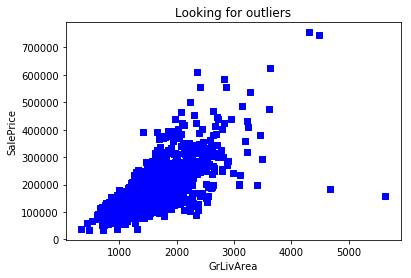

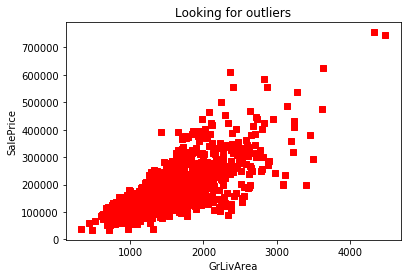

In [285]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.figure(1);
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
train = train.drop(train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)].index)
plt.figure(2);
plt.scatter(train.GrLivArea, train.SalePrice, c = "red", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

### Drop Id column

In [286]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1458, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1458, 80) 
The test data size after dropping Id feature is : (1459, 79) 


### Target Variable 'SalePrice'
- SalePrice is the variable we need to predict we so perform analysis first.


 mu = 180932.92 and sigma = 79467.79



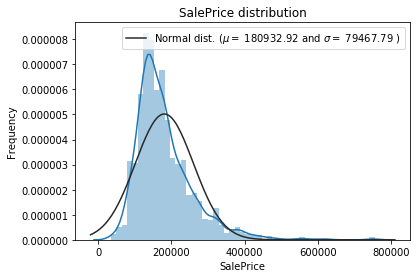

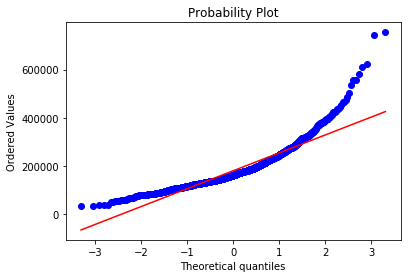

In [287]:
sns.distplot(train['SalePrice'], fit=st.norm);

# Get the fitted parameters
(mu, sigma) = st.norm.fit(train[('SalePrice')])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = st.probplot(train[('SalePrice')], plot=plt)
plt.show()

We can see the target variable is right skewed and since linear models love normally skewed data, let's transform it to be normally distributed


 mu = 12.02 and sigma = 0.40



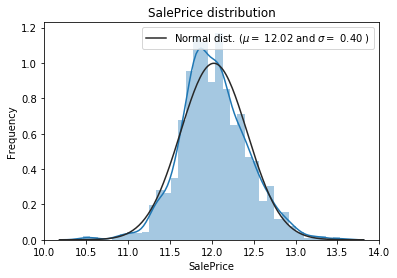

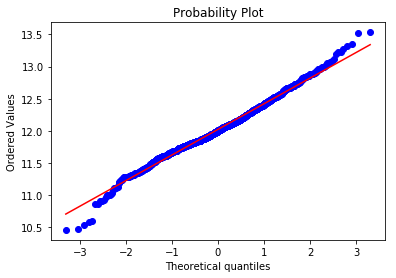

In [288]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=st.norm);

# Get the fitted parameters used by the function
(mu, sigma) = st.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = st.probplot(train['SalePrice'], plot=plt)
plt.show()

Now we clearly see a normally distributed target variable

### Concatenate to preprocess all features at once

In [289]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### Split into norminal and ordinal independent variables


In [290]:
quant = [f for f in train.columns if train.dtypes[f] != 'object']
quant.remove('SalePrice')
qual = [f for f in train.columns if train.dtypes[f] == 'object']

### Missing Values


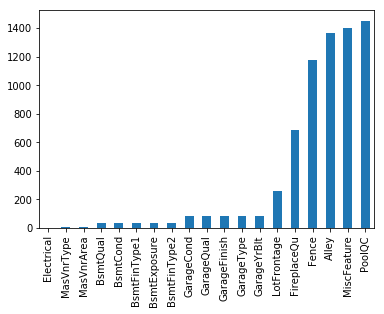

In [291]:
# train
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

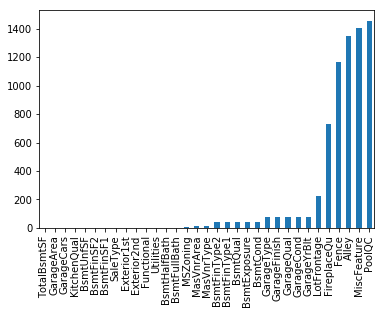

In [292]:
# train
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

In [293]:
# Get all possible missing features from test and train
missing = set().union(missing_test.index, missing_train.index)

In [294]:
# Split into list of quantitative variables with missing values and qualitative variables with missing values
quant_m = []
qual_m = []
for i in missing:
    if i in quant: quant_m.append(i)
    else: qual_m.append(i)
print('Quantitative variables with missing values:' + str(quant_m) + '\n')
print('Qualitative variables with missing values:' +  str(qual_m))

Quantitative variables with missing values:['BsmtFinSF1', 'GarageYrBlt', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'LotFrontage', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2', 'TotalBsmtSF', 'MasVnrArea']

Qualitative variables with missing values:['GarageFinish', 'KitchenQual', 'Exterior2nd', 'Electrical', 'GarageQual', 'BsmtCond', 'Functional', 'BsmtFinType2', 'MSZoning', 'Exterior1st', 'BsmtFinType1', 'FireplaceQu', 'BsmtQual', 'Fence', 'SaleType', 'GarageCond', 'MiscFeature', 'BsmtExposure', 'Alley', 'GarageType', 'MasVnrType', 'PoolQC', 'Utilities']


#### Impute Quantitative Variables

In [295]:
# Masonry veneer area in square feet
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [296]:
#'GarageArea': Probably 0 cuz no garage
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [297]:
# GarageCars
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

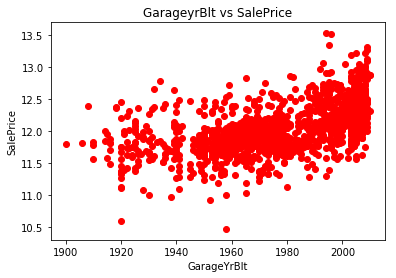

In [298]:
# 'GarageYrBlt'
# Can't just impute 0 into missing years. The houses are likely missing a garage which means they are missing a year built.
# Fill with the year a garage was built from the hosue with closest saleprice Is what I want to do
plt.scatter(all_data['GarageYrBlt'][:ntrain], y_train, c = "red")
plt.title("GarageyrBlt vs SalePrice")
plt.xlabel('GarageYrBlt')
plt.ylabel("SalePrice")
plt.show()

# For now.......................
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

In [299]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [300]:
# 'TotalBsmtSF': Square feet of basement
# Basically all basement sq ft
for c in ['TotalBsmtSF', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtHalfBath', 'BsmtUnfSF']:
    all_data[c] = all_data[c].fillna(0)

#### Impute Qualitative Variables

In [301]:
# Electrical. It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [302]:
# 'RL' is the most common so just use that
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [303]:
# Utilities : For this categorical feature all records are "AllPub", 
# except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
# this feature won't help in predictive modelling. We can then safely remove it
all_data = all_data.drop(['Utilities'], axis=1)
qual.remove('Utilities')

In [304]:
# Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [305]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. 
# We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [306]:
# Fill in with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [307]:
# Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [308]:
for c in ['BsmtQual', 'BsmtFinType1', 'MasVnrType', 'Fence', 'FireplaceQu','GarageType','MiscFeature','BsmtExposure',
          'GarageQual','BsmtCond', 'Alley','BsmtFinType2', 'GarageFinish', 'GarageCond', 'PoolQC']:
    all_data[c] = all_data[c].fillna('None')

In [309]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


None missing values

### Transforming Numerical variables that were actually Categorical

In [310]:
# #MSSubClass=The building class
# all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# #Changing OverallCond into a categorical variable
# all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# #Year and month sold are transformed into categorical features.
# all_data['YrSold'] = all_data['YrSold'].astype(str)
# all_data['MoSold'] = all_data['MoSold'].astype(str)

### For now, just doing the encoding outside of the CV loop. Theoretically it will be more accurate inside the loop but for large number of data it doesn't matter. 
- Encoding variables that contain information in their ordering

In [311]:
all_data['MoSold']

0        2
1        5
2        9
3        2
4       12
5       10
6        8
7       11
8        4
9        1
10       2
11       7
12       9
13       8
14       5
15       7
16       3
17      10
18       6
19       5
20      11
21       6
22       9
23       6
24       5
25       7
26       5
27       5
28      12
29       5
        ..
2887     3
2888     4
2889    10
2890    10
2891     4
2892     2
2893    12
2894     9
2895    10
2896     5
2897     5
2898     3
2899    10
2900    11
2901     9
2902     5
2903    11
2904     5
2905    10
2906     3
2907     4
2908     5
2909     5
2910    12
2911     6
2912     6
2913     4
2914     9
2915     7
2916    11
Name: MoSold, Length: 2917, dtype: int64

In [312]:
from category_encoders import TargetEncoder
# cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold']
# process columns, apply TargetEncoder to categorical features
train = all_data[:ntrain]
t_enc = TargetEncoder(cols=qual).fit(train, y_train)
all_data = t_enc.transform(all_data)

# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### Add extra feature that people usually look at 


In [313]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Transforming skewed features

In [314]:
numeric_feats_indices = all_data.dtypes[all_data.dtypes != "object"].index

# check the skewness of all numerical features
skewed_feats = all_data[numeric_feats_indices].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

Skew in numerical features: 



,Skew
PoolQC,24.061
MiscVal,21.940
PoolArea,17.689
RoofMatl,15.401
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.908
KitchenAbvGr,4.301
BsmtFinSF2,4.145


Box cox performed better than log transform:

Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

In [315]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)  

There are 79 skewed numerical features to Box Cox transform


### Split all_data back to train and tests sets

In [316]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print("Train shape: {} \nTest shape: {}".format(train.shape, test.shape))

Train shape: (1458, 79) 
Test shape: (1459, 79)


## Cross Validation 

In [317]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Models

In [318]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Base Models

_Lasso Regression_:

Model is sensitive to ouliers. Do some scaling beforehand

In [319]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

_Elastic Net Regression_

In [320]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

_Kernel Ridge Regression_

In [321]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

_Gradient Boosting regression_

__huber__ loss makes it robust to outliers

In [322]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

_XGBoost_

In [323]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

_LightGBM_

In [324]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base Model Scores

In [325]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1213 (0.0046)



In [326]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1213 (0.0046)



In [327]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1263 (0.0047)



In [328]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1166 (0.0087)



In [329]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1151 (0.0055)



In [330]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1162 (0.0071)



### Stacking Models

Simplest stacking approach: Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to leverage encapsulation and code reuse (inheritance)

### Averaging Base Models

In [331]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

In [332]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1143 (0.0057)



In [333]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [334]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1111 (0.0058)


### Ensembling StackedRegressor, XGBoost and LightGBM

In [335]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [336]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0750088856959808


In [337]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07917660049072447


In [338]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07141425870073981


In [339]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07281667088194818


In [340]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [341]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [342]:
s = pd.read_csv('submission.csv')
s.shape

(1459, 2)